In [1]:
from datetime import datetime, timedelta
from shapely import LineString, Point
import mobilib as mobilib
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('./test.csv')
df = test[test['id'] == test['id'].unique()[0]]

In [3]:
# now = datetime.now()
# test['datetime'] = test['timestep'].apply(lambda t: now + timedelta(0, t))

In [4]:
traj = mobilib.Trajectory(df=df, x='x', y='y', t='datetime',is_latlng=True)

### Spacial Query

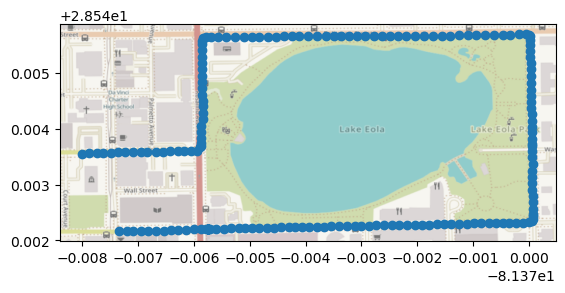

In [5]:
mobilib.visualization.image.plot(traj)

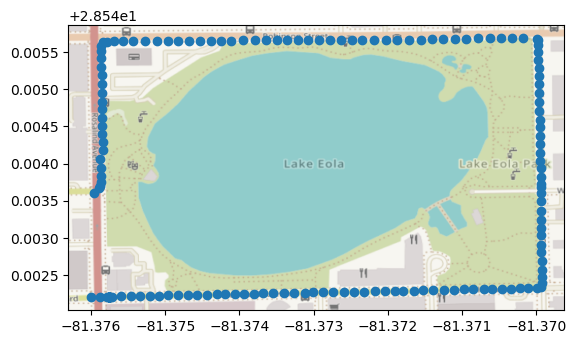

In [6]:
query = mobilib.management.spacial_query(traj, -81.376006,  28.542165, -81.369924,  28.545695)
mobilib.visualization.image.plot(query)

### Temporal Query

In [7]:
start = '2023-11-15 18:14:26.725897'
end = '2023-11-15 18:14:41.725897' 
query = mobilib.management.temporal_query(traj, start, end)

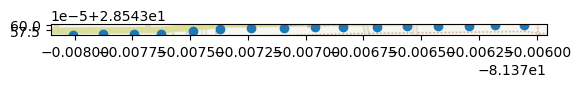

In [8]:
mobilib.visualization.image.plot(query)

### KNN Query

In [9]:
geo = LineString([
    Point(-81.37538454278695, 28.544885825638552),
    Point(-81.37535419684313, 28.54517238822342),
    Point(-81.37510763683406, 28.54527901583028),
])

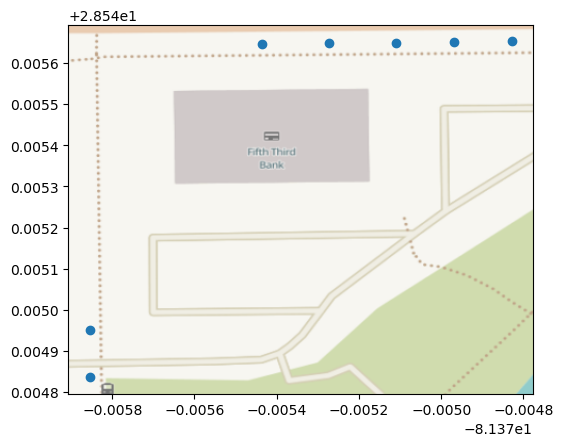

In [10]:
query = mobilib.management.knn_query(traj, 7, geo)
mobilib.image.plot(query)

### Similarity Query

In [11]:
test['id'].unique()[1:5]

array(['truck0', 'ped0', 'bus0', 'truck1'], dtype=object)

In [12]:
df1 = test[test['id'] == test['id'].unique()[1]]
df2 = test[test['id'] == test['id'].unique()[2]]
df3 = test[test['id'] == test['id'].unique()[3]]
df4 = test[test['id'] == test['id'].unique()[4]]

In [13]:
truck0 = mobilib.Trajectory(df=df1, x='x', y='y', t='datetime', is_latlng=True)
ped0 = mobilib.Trajectory(df=df2, x='x', y='y', t='datetime', is_latlng=True)
bus0 = mobilib.Trajectory(df=df3, x='x', y='y', t='datetime', is_latlng=True)
truck1 = mobilib.Trajectory(df=df4, x='x', y='y', t='datetime', is_latlng=True)
ts = [ped0, bus0, truck1]

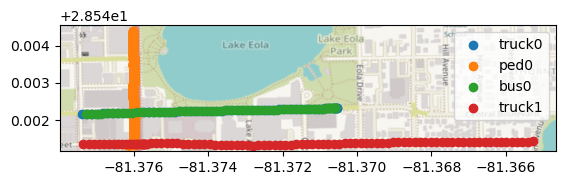

In [14]:
mobilib.visualization.image.plot([truck0,*ts])

In [15]:
query = mobilib.management.similarity_query(truck0, ts)

[0. 0.]
[0. 0.]
[0. 0.]


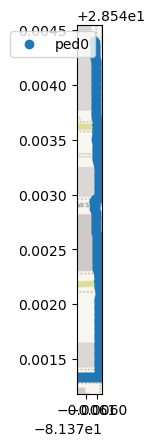

In [16]:
mobilib.visualization.image.plot([query])